**PROJECT 3**

DESCRIPTION

The dataset provided contains movie reviews given by Amazon customers. Reviews were given between May 1996 and July 2014.

**Data Dictionary**

UserID – 4848 customers who provided a rating for each movie
Movie 1 to Movie 206 – 206 movies for which ratings are provided by 4848 distinct users

**Data Considerations**

- All the users have not watched all the movies and therefore, all movies are not rated. These missing values are represented by NA.
- Ratings are on a scale of -1 to 10 where -1 is the least rating and 10 is the best.

**Analysis Task** - Exploratory Data Analysis:

* Which movies have maximum views/ratings?
* What is the average rating for each movie? Define the top 5 movies with the maximum ratings.

* Define the top 5 movies with the least audience.


   Recommendation Model: Some of the movies hadn’t been watched and therefore, are not rated by the users. Netflix would like to take this as an opportunity and build a machine learning recommendation algorithm which provides the ratings for each of the users.

* Divide the data into training and test data
* Build a recommendation model on training data
* Make predictions on the test data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df1=pd.read_csv('Amazon - Movies and TV Ratings.csv')
df1.head()

,user_id,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,...,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
0,A3R5OBKS7OM2IR,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AH3QC2PC1VTGP,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A3LKP6WPMP9UKX,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AVIY68KEPQ5ZD,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A1CV1WROP5KTTW,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
idx=['user_id']
multi_indexed_df = df1.set_index(idx)
stacked_df = multi_indexed_df.stack(dropna=False)

In [4]:
stacked_df.head(10)

user_id                
A3R5OBKS7OM2IR  Movie1     5.0
                Movie2     5.0
                Movie3     NaN
                Movie4     NaN
                Movie5     NaN
                Movie6     NaN
                Movie7     NaN
                Movie8     NaN
                Movie9     NaN
                Movie10    NaN
dtype: float64

In [5]:
long_df = stacked_df.reset_index()
long_df.head(10)

,user_id,level_1,0
0,A3R5OBKS7OM2IR,Movie1,5.0
1,A3R5OBKS7OM2IR,Movie2,5.0
2,A3R5OBKS7OM2IR,Movie3,NaN
3,A3R5OBKS7OM2IR,Movie4,NaN
4,A3R5OBKS7OM2IR,Movie5,NaN
5,A3R5OBKS7OM2IR,Movie6,NaN
6,A3R5OBKS7OM2IR,Movie7,NaN
7,A3R5OBKS7OM2IR,Movie8,NaN
8,A3R5OBKS7OM2IR,Movie9,NaN
9,A3R5OBKS7OM2IR,Movie10,NaN


In [6]:
df3=long_df.rename(columns={'user_id':'UserID','level_1':'Movie',0:'Rating'})
df3.head()

,UserID,Movie,Rating
0,A3R5OBKS7OM2IR,Movie1,5.0
1,A3R5OBKS7OM2IR,Movie2,5.0
2,A3R5OBKS7OM2IR,Movie3,NaN
3,A3R5OBKS7OM2IR,Movie4,NaN
4,A3R5OBKS7OM2IR,Movie5,NaN


In [7]:
#Dataset without NaN in Rating
df4=df3[df3.Rating.notnull()]

In [8]:
print('No of users :',len(np.unique(df4.UserID)))
print('No of Movies :',len(np.unique(df4.Movie)))

No of users : 4848
No of Movies : 206


#### Which movies have maximum views/ratings?

In [9]:
df4.groupby('Movie')['Rating'].count().sort_values(ascending=False).head()

Movie
Movie127    2313
Movie140     578
Movie16      320
Movie103     272
Movie29      243
Name: Rating, dtype: int64

#### What is the average rating for each movie?

In [10]:
ratings = pd.DataFrame(df4.groupby('Movie')['Rating'].mean())  
  
ratings['num of ratings'] = pd.DataFrame(df4.groupby('Movie')['Rating'].count()) 

In [11]:
ratings.sort_values('num of ratings', ascending = False)

,Rating,num of ratings
Movie,,
Movie127,4.111976,2313
Movie140,4.833910,578
Movie16,4.518750,320
Movie103,4.562500,272
Movie29,4.806584,243
...,...,...
Movie38,5.000000,1
Movie37,5.000000,1
Movie36,5.000000,1


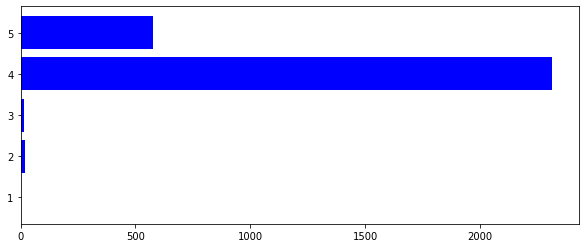

In [12]:
#plot rounded-up ratings with number of movies
plt.figure(figsize =(10, 4))
ax=plt.barh(ratings['Rating'].round(),ratings['num of ratings'],color='b')
plt.show()

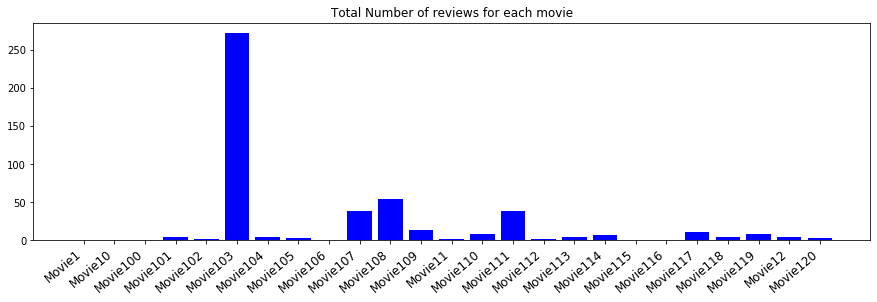

In [13]:
#a bar graph descibibg number of reviews for first 25 movies
plt.figure(figsize =(15, 4))
ax=plt.subplot()
ax.bar(ratings.head(25).index,ratings['num of ratings'].head(25),color='b')
ax.set_xticklabels(ratings.index,rotation=40,fontsize='12',horizontalalignment="right")
ax.set_title("Total Number of reviews for each movie")
plt.show()

#### Define the top 5 movies with the maximum ratings

In [14]:
ratings.sort_values(['Rating','num of ratings'], ascending = False).head()

,Rating,num of ratings
Movie,,
Movie186,5.0,9
Movie188,5.0,6
Movie191,5.0,6
Movie101,5.0,5
Movie118,5.0,5


#### Define the top 5 movies with the least audience

In [15]:
ratings.sort_values('num of ratings', ascending = True).head()

,Rating,num of ratings
Movie,,
Movie1,5.0,1
Movie38,5.0,1
Movie41,5.0,1
Movie42,5.0,1
Movie45,1.0,1


In [16]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [17]:
X=pd.get_dummies(df4[['UserID','Movie']])
X.head()

,UserID_A0047322388NOTO4N8SKD,UserID_A00473363TJ8YSZ3YAGG9,UserID_A1004AX2J2HXGL,UserID_A100CQXJ6D44T9,UserID_A100Z2S0880G9A,UserID_A1027BL79BSP5P,UserID_A102Z4PIK7CYD8,UserID_A10367AR7BPFG2,UserID_A103HNKB9YAN6P,UserID_A103KNDW8GN92L,...,Movie_Movie90,Movie_Movie91,Movie_Movie92,Movie_Movie93,Movie_Movie94,Movie_Movie95,Movie_Movie96,Movie_Movie97,Movie_Movie98,Movie_Movie99
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
208,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
415,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
621,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
Y=pd.get_dummies(df4[['Rating']])
Y.head()

,Rating
0,5.0
1,5.0
208,2.0
415,5.0
621,5.0


In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .20, random_state = 40)
regr = linear_model.LinearRegression()

In [20]:
regr.fit(X_train, Y_train)
predicted = regr.predict(X_test)

In [21]:
regr.score(X_train,Y_train)*100

98.26352939247401